# Machine Learning Model to Predict the Stock Market (S&P500)

### Farrah Chan

Credits to Vikas Paruchuri and his video on Machine Learning applications to the Stock Market https://www.youtube.com/watch?v=1O_BenficgE&ab_channel=Dataquest

**Downloading Yahoo Finance Data**

To start, I imported the Yahoo Finance module into the notebook and assigned the shortened identifier to the package. Afterwards, I collected the ticker data and used the command of .history to gather all the data from the S&P 500 stocks since the creation of the index in 1927.

In [2]:
!pip install yfinance
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached frozendict-2.3.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (115 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-2.28.2:
      Successfully uninstalled requests-2.28.2


In [3]:
sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period="max") #data from the beginning of the index

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-28 00:00:00-04:00,4565.750000,4590.160156,4564.009766,4582.229980,3981010000,0.0,0.0
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,0.0,0.0
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,0.0,0.0


**Filtering the Data**

After I looked at the index data, I noticed there there were a lot of zeroes under the Dividends and Stock Splits columns and decided to remove them as they do not help me identify stock trends. In a quick graph, I set the date to the x-axis and the closing price per trading day to the y-axis. This graph demonstrates the changes in price of the S&P500 stocks at the end of each trading day. 

In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-21 00:00:00-04:00', '2023-07-24 00:00:00-04:00',
               '2023-07-25 00:00:00-04:00', '2023-07-26 00:00:00-04:00',
               '2023-07-27 00:00:00-04:00', '2023-07-28 00:00:00-04:00',
               '2023-07-31 00:00:00-04:00', '2023-08-01 00:00:00-04:00',
               '2023-08-02 00:00:00-04:00', '2023-08-03 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24012, freq=None)

<Axes: xlabel='Date'>

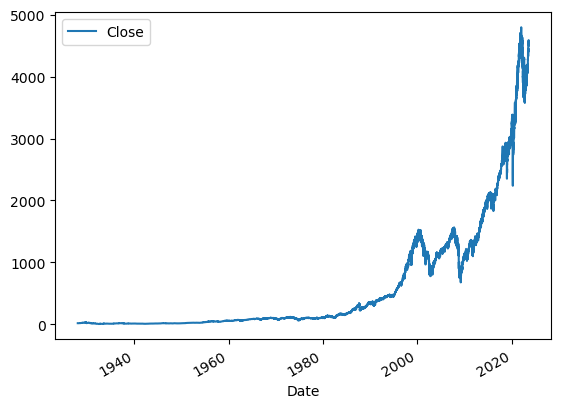

In [7]:
sp500.plot.line(y="Close", use_index=True) #show the closing price and the date-time for trading days

In [8]:
del sp500["Dividends"]
del sp500["Stock Splits"]

This graph shows us that the overarching trend has been an increase in price shortly after 1980 and drastic increases in the 2000s-2020s. Then I decided to create a new column called Tomorrow which would begin with the previous day's closing price. To do this, I used the .shift command and set it to -1 to move all the closing data one day behind and call that the Tomorrow column

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-07-28 00:00:00-04:00,4565.750000,4590.160156,4564.009766,4582.229980,3981010000,4588.959961
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137


Additionally, I decided to create a new column called Target to show the directionality of these changes. 1 indicates an increase in price and 0 is a decrease. To do so, I compared the Tomorrow and Close columns and if the price of the Tomorrow column was greater than the previous day's Close, it would produce a 1 in the Target column.

In [13]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) #shows target 1 means up 0 means down

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-07-28 00:00:00-04:00,4565.750000,4590.160156,4564.009766,4582.229980,3981010000,4588.959961,1
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980,0
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0


Furthermore, to make our data more specific I decided to filter for stock data only after the year 1990. 

In [15]:
sp500 = sp500.loc["1990-01-01":].copy() #data after 1990

In [16]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-07-28 00:00:00-04:00,4565.750000,4590.160156,4564.009766,4582.229980,3981010000,4588.959961,1
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980,0
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0


After filtering the data, I decided to work with a Random Forest classifier because they tend to be less prone to overfitting and is perfect when working with time-series data. In order to create a prediction model, I split up the data into two sections, the training set and the testing set. 

To begin, this model needed to be small so I set n_estimators to 100 and added the min_samples_split clause as another way to prevent overfitting. Finally, the seed needed to be unique so I added the random_state=1 clause at the end to reproduce these results in the future.

The predictors I wanted to focus on here were the closing day price, the volume of sales, the opening price, and the highest and lowest prices of the stock per trading day. 

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
#n_estimators is 100 for quick process and min_samples_split is to protect from overfitting

train = sp500.iloc[:-100] #everything but last 100 rows
test = sp500.iloc[-100:] #the last 100 rows

#we can not use cross validation with time-series data, so we will build a model that can actually predict future prices

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

After creating the model, it was very important to then import a metric that will allow us to test how accurate the model is. In this case I use the precision_score metric. Initially the data was displayed in a numpy array, which is difficult to read. So instead I imported the pandas package to show the date and the target columns

In [18]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [21]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [22]:
preds

Date
2023-03-13 00:00:00-04:00    0
2023-03-14 00:00:00-04:00    1
2023-03-15 00:00:00-04:00    0
2023-03-16 00:00:00-04:00    1
2023-03-17 00:00:00-04:00    0
                            ..
2023-07-28 00:00:00-04:00    1
2023-07-31 00:00:00-04:00    1
2023-08-01 00:00:00-04:00    1
2023-08-02 00:00:00-04:00    1
2023-08-03 00:00:00-04:00    1
Length: 100, dtype: int64

In [23]:
precision_score(test["Target"], preds)

0.5714285714285714

When we used the precision_score metric, it showed us a 57% which is not a bad prediction score but we want to explore further why this is the case. Creating the graph with the Target and the predictions, we can see that there was a lot of overlap between the actual results and the predicted results.

In [25]:
combined = pd.concat([test["Target"],preds], axis=1)

<Axes: xlabel='Date'>

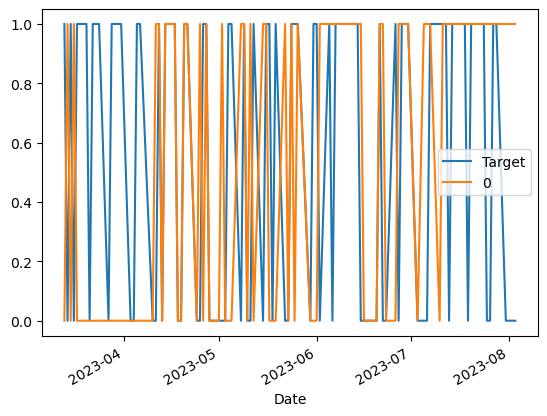

In [26]:
combined.plot()

**Backtesting System**

Now we want to build a better way of testing our system outside of the train/test model we created so far. This will allow us to increase the time period of which we are assessing. In order to enable backtesting, we need to create a new prediction function and a backtest function. The backtest function will allow us to create new predictions for following years based on all the prevoius year's compounding data.

In [27]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [39]:
def backtest(data, model, predictors, start=2500, step=250): #every trading year has around 250 days, so start means 10 years and step means 1 year
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [40]:
predictions = backtest(sp500, model, predictors)

In [41]:
predictions["Predictions"].value_counts() #counts how many times each prediction was made

0    3433
1    2529
Name: Predictions, dtype: int64

In [42]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5298536971134836

What this precision score tells us is that based on the data provided in the previous years, if we were to predict the price went up it would have gone up 53% of the time

In [44]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534049
0    0.465951
Name: Target, dtype: float64

Notice that when we check to see how the model will do naturally by seeing how the model predicts versus how the market naturally behaves, the model did worse than the natural percentage

Now we are setting up horizons, which means the means between the last 2 days, the lat 5 days, the last 3 months, the last year and the last 4 years. 

Under new_predictors I will then add new columns to the existing data. So now we are creating a Ratio column which divides the closing price by the rolling average of previous closing prices. Additionally, we will look at trends where we will shift forward the target and sum up all the previous targets. 

In [ ]:
horizons = [2,5,60,250,1000] #looking at rolling means in these time periods
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

When we look at sp500 now, it will show some NaN values because some rolling sums and averages at the beginning of the table because there is no prior data to compare to. The trend would not include the day it is interpreting but includes every day before that. 

To make this easier to read and analyze, we will get rid of these NaNs

In [49]:
sp500 = sp500.dropna()

In [50]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-27 00:00:00-04:00,4598.259766,4607.069824,4528.560059,4537.410156,4553210000,4582.229980,1,0.996777,0.0,0.996681,3.0,1.049957,34.0,1.119703,120.0,1.188245,536.0
2023-07-28 00:00:00-04:00,4565.750000,4590.160156,4564.009766,4582.229980,3981010000,4588.959961,1,1.004915,1.0,1.004501,3.0,1.058440,35.0,1.130259,120.0,1.199449,536.0
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980,0,1.000734,2.0,1.004465,3.0,1.057966,36.0,1.131394,121.0,1.200692,536.0


Now the model can be improved to add more n_estimators and min_samples_split is smaller. To add to the previous predict model, we will now add probability by adding proba to the end of the model.predict in line 3. Additionally, we want to get the second column using [:,1] and then set the threshold for the criteria for 1 or 0 to be above 60%. This will reduce our total amount of trading days but also increase the chance of us making a trade on a stock which may increase in price.

After the changes we can re-run the backtest function on the sp500 data using the model and the new_predictors we assigned previously.

In [51]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [52]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] #predict_proba returns a probability of a 0 or 1
    preds [preds >= .6] = 1
    preds [preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [53]:
predictions = backtest(sp500, model, new_predictors)

In [54]:
predictions["Predictions"].value_counts()

0.0    4144
1.0     817
Name: Predictions, dtype: int64

In [56]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5691554467564259

After changing the threshold for 1 or 0, there are fewer Target with 1 and more with 0. In the end we notice that this is a higher precision score than before. So when the model predicts that the stock will go up, it is now more precise to predicting the trends in the stock market.

**Reflection**

This project was a really fun learning experience and I gained a lot more intuition when working with machine learning models, prediction metrics, and financial data. 

If I were to create another project similar to this one, I would expand it to more stocks and be able to create larger dynamic graphs to show these market trends. Certain ways that I can think of improving this is to analyze news articles and how they affect the stock market, effects of ESG policy changes, or to focus on a specific industry.